In [32]:
import scanpy as sc
import anndata as ad


In [33]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)

In [42]:
DATA_PATH = '/projectnb/czproj/Algorithms/ycliu/scDiffusion/outputs/scVI_datasets/'

OUTPUT_PATH = '/projectnb/czlab/A00/ycliu/scRNA_integration_benchmark_datasets/PBMC17K/'


# Load data

In [35]:
adata_all = sc.read_h5ad(DATA_PATH + 'pbmc_seurat_v4_cite_seq.h5ad')

In [36]:
adata_all

AnnData object with n_obs × n_vars = 152094 × 20729
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'nCount_SCT', 'nFeature_SCT', 'X_index', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Protein log library size', 'Number proteins detected', 'RNA log library size'
    var: 'mt'
    obsm: 'protein_counts'

In [37]:
adata_all.obs['batch'] = adata_all.obs['orig.ident']
adata_all.obs['batch']

L1_AAACCCAAGAAACTCA      P2_7
L1_AAACCCAAGACATACA      P1_7
L1_AAACCCACAACTGGTT      P4_3
L1_AAACCCACACGTACTA      P3_7
L1_AAACCCACAGCATACT      P4_7
                         ... 
E2L8_TTTGTTGGTCGTGATT    P5_7
E2L8_TTTGTTGGTGTGCCTG    P5_3
E2L8_TTTGTTGGTTAGTTCG    P8_0
E2L8_TTTGTTGGTTGGCTAT    P5_3
E2L8_TTTGTTGTCTCATGGA    P5_7
Name: batch, Length: 152094, dtype: category
Categories (24, object): ['P1_0', 'P1_3', 'P1_7', 'P2_0', ..., 'P7_7', 'P8_0', 'P8_3', 'P8_7']

In [38]:
import numpy as np

unique_elements, counts = np.unique(adata_all.obs['batch'], return_counts=True)

for element, count in zip(unique_elements, counts):
    print(f"{element}:  {count}")

P1_0:  6243
P1_3:  5758
P1_7:  5645
P2_0:  5791
P2_3:  5562
P2_7:  5365
P3_0:  4567
P3_3:  4861
P3_7:  4847
P4_0:  5221
P4_3:  5686
P4_7:  5871
P5_0:  6322
P5_3:  6359
P5_7:  7276
P6_0:  5606
P6_3:  6972
P6_7:  6333
P7_0:  8430
P7_3:  7639
P7_7:  8151
P8_0:  8135
P8_3:  8289
P8_7:  7165


In [39]:
adata = adata_all[adata_all.obs['batch'].isin(['P2_0', 'P2_3', 'P2_7'])]
adata

View of AnnData object with n_obs × n_vars = 16718 × 20729
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'nCount_SCT', 'nFeature_SCT', 'X_index', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Protein log library size', 'Number proteins detected', 'RNA log library size', 'batch'
    var: 'mt'
    obsm: 'protein_counts'

In [40]:
adata.obs['labels'] = adata.obs['celltype.l2']
adata.obs['labels']

/scratch/7172099.1.v100/ipykernel_262965/1472789039.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['labels'] = adata.obs['celltype.l2']


L1_AAACCCAAGAAACTCA    CD14 Mono
L1_AAACCCATCTTAAGGC      CD4 CTL
L1_AAACGAAAGATAACAC      B naive
L1_AAACGAACAAGAGTAT           NK
L1_AAACGAATCCCGTTGT      CD8 TEM
                         ...    
L5_TTTGTTGGTACGATCT           NK
L5_TTTGTTGGTCCTTAAG    CD8 Naive
L5_TTTGTTGTCAACACCA    CD14 Mono
L5_TTTGTTGTCATGCATG    CD8 Naive
L5_TTTGTTGTCCGTGCGA    CD14 Mono
Name: labels, Length: 16718, dtype: category
Categories (30, object): ['ASDC', 'B intermediate', 'B memory', 'B naive', ..., 'cDC2', 'dnT', 'gdT', 'pDC']

# Export dataset

In [43]:
adata

AnnData object with n_obs × n_vars = 16718 × 20729
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'nCount_SCT', 'nFeature_SCT', 'X_index', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Protein log library size', 'Number proteins detected', 'RNA log library size', 'batch', 'labels'
    var: 'mt'
    obsm: 'protein_counts'

In [44]:
columns_to_remove = ['nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 
                     'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 
                     'celltype.l3', 'Phase', 'nCount_SCT', 'nFeature_SCT', 'X_index', 'total_counts', 
                     'total_counts_mt', 'pct_counts_mt', 'Protein log library size', 
                     'Number proteins detected', 'RNA log library size']
adata.obs.drop(columns_to_remove, axis=1, inplace=True)
adata

AnnData object with n_obs × n_vars = 16718 × 20729
    obs: 'batch', 'labels'
    var: 'mt'
    obsm: 'protein_counts'

In [45]:
adata.var['gene_ids'] = adata.var.index
adata.var['gene_symbols'] = adata.var.index
adata.var['feature_types'] = 'Gene Expression'
adata.var.drop(['mt'], axis=1, inplace=True)

adata

AnnData object with n_obs × n_vars = 16718 × 20729
    obs: 'batch', 'labels'
    var: 'gene_ids', 'gene_symbols', 'feature_types'
    obsm: 'protein_counts'

In [46]:
adata.obsm.pop('protein_counts')

adata

AnnData object with n_obs × n_vars = 16718 × 20729
    obs: 'batch', 'labels'
    var: 'gene_ids', 'gene_symbols', 'feature_types'

In [47]:
adata.var

,gene_ids,gene_symbols,feature_types
AL627309.1,AL627309.1,AL627309.1,Gene Expression
AL669831.5,AL669831.5,AL669831.5,Gene Expression
LINC00115,LINC00115,LINC00115,Gene Expression
FAM41C,FAM41C,FAM41C,Gene Expression
NOC2L,NOC2L,NOC2L,Gene Expression
...,...,...,...
AC016588.1,AC016588.1,AC016588.1,Gene Expression
FAM83E,FAM83E,FAM83E,Gene Expression
Z82244.2,Z82244.2,Z82244.2,Gene Expression
AP001468.1,AP001468.1,AP001468.1,Gene Expression


In [48]:
adata.X

<16718x20729 sparse matrix of type '<class 'numpy.float32'>'
	with 29870199 stored elements in Compressed Sparse Row format>

## Save anndata

In [50]:
adata.write(OUTPUT_PATH+'pbmc17k.h5ad')

## Save 10X data

In [51]:
import scipy.io
from scipy.sparse import csr_matrix
import numpy as np
import gzip

def save_10X_data(path, data, X_sparse=False):
    """
    args:   path, data. data included three numpy array valued components (counts_matrix, genes, cells).
    """
    counts_matrix, genes, cells = data # 
    
    # compress counts_matrix
    if X_sparse:
        counts_matrix = counts_matrix.T
    else:
        counts_matrix = csr_matrix(counts_matrix).T
    
    with gzip.open(path+'matrix.mtx.gz', 'wb') as f:
        scipy.io.mmwrite(f, counts_matrix)
        
    with gzip.open(path+'features.tsv.gz', 'wt') as f:
        np.savetxt(f, genes, delimiter='\t', fmt='%s')
        
    with gzip.open(path+'barcodes.tsv.gz', 'wt') as f:
        np.savetxt(f, cells, delimiter='\t', fmt='%s')

In [52]:
import numpy as np
counts_matrix = adata.X
genes = np.array(adata.var)
cells = np.array(adata.obs.index)
labels =  np.array(adata.obs['labels'])
batch = np.array(adata.obs['batch'])

In [53]:
data = counts_matrix, genes, cells
save_10X_data(OUTPUT_PATH, data, X_sparse=True)

In [54]:
np.savetxt(OUTPUT_PATH+'labels.csv', labels, delimiter='\t', fmt='%s')
np.savetxt(OUTPUT_PATH+'batch.csv', batch, delimiter='\t', fmt='%s')

## Check 10X data

In [55]:
adata_2 = sc.read_10x_mtx(OUTPUT_PATH)
adata_2

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


AnnData object with n_obs × n_vars = 16718 × 20729
    var: 'gene_ids', 'feature_types'

In [56]:
import pandas as pd
import numpy as np

df = pd.read_csv(OUTPUT_PATH+'batch.csv', sep='\t', header=None)

adata_2.obs['batch'] = np.array(df)[:,0]
adata_2.obs['batch'] = adata_2.obs['batch'].astype('category')


df = pd.read_csv(OUTPUT_PATH+'labels.csv', sep='\t', header=None)
df
adata_2.obs['labels'] = np.array(df)[:,0]
adata_2.obs['labels'] = adata_2.obs['labels'].astype('category')


In [57]:
adata_2.var

,gene_ids,feature_types
AL627309.1,AL627309.1,Gene Expression
AL669831.5,AL669831.5,Gene Expression
LINC00115,LINC00115,Gene Expression
FAM41C,FAM41C,Gene Expression
NOC2L,NOC2L,Gene Expression
...,...,...
AC016588.1,AC016588.1,Gene Expression
FAM83E,FAM83E,Gene Expression
Z82244.2,Z82244.2,Gene Expression
AP001468.1,AP001468.1,Gene Expression


In [58]:
adata_2.obs

,batch,labels
L1_AAACCCAAGAAACTCA,P2_7,CD14 Mono
L1_AAACCCATCTTAAGGC,P2_3,CD4 CTL
L1_AAACGAAAGATAACAC,P2_3,B naive
L1_AAACGAACAAGAGTAT,P2_7,NK
L1_AAACGAATCCCGTTGT,P2_3,CD8 TEM
...,...,...
L5_TTTGTTGGTACGATCT,P2_3,NK
L5_TTTGTTGGTCCTTAAG,P2_7,CD8 Naive
L5_TTTGTTGTCAACACCA,P2_3,CD14 Mono
L5_TTTGTTGTCATGCATG,P2_3,CD8 Naive


## Check anndata

In [59]:
adata = sc.read_h5ad(OUTPUT_PATH+ 'pbmc17k.h5ad')
adata

AnnData object with n_obs × n_vars = 16718 × 20729
    obs: 'batch', 'labels'
    var: 'gene_ids', 'gene_symbols', 'feature_types'

In [60]:
adata.var

,gene_ids,gene_symbols,feature_types
AL627309.1,AL627309.1,AL627309.1,Gene Expression
AL669831.5,AL669831.5,AL669831.5,Gene Expression
LINC00115,LINC00115,LINC00115,Gene Expression
FAM41C,FAM41C,FAM41C,Gene Expression
NOC2L,NOC2L,NOC2L,Gene Expression
...,...,...,...
AC016588.1,AC016588.1,AC016588.1,Gene Expression
FAM83E,FAM83E,FAM83E,Gene Expression
Z82244.2,Z82244.2,Z82244.2,Gene Expression
AP001468.1,AP001468.1,AP001468.1,Gene Expression


In [61]:
adata.obs

,batch,labels
L1_AAACCCAAGAAACTCA,P2_7,CD14 Mono
L1_AAACCCATCTTAAGGC,P2_3,CD4 CTL
L1_AAACGAAAGATAACAC,P2_3,B naive
L1_AAACGAACAAGAGTAT,P2_7,NK
L1_AAACGAATCCCGTTGT,P2_3,CD8 TEM
...,...,...
L5_TTTGTTGGTACGATCT,P2_3,NK
L5_TTTGTTGGTCCTTAAG,P2_7,CD8 Naive
L5_TTTGTTGTCAACACCA,P2_3,CD14 Mono
L5_TTTGTTGTCATGCATG,P2_3,CD8 Naive


# Preprocess

filtered out 1502 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes


/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


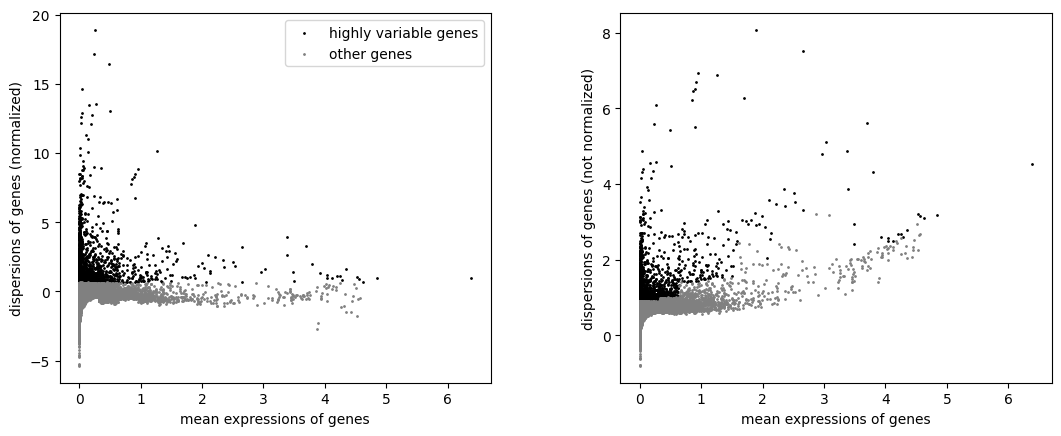

In [27]:
sc.pp.filter_genes(adata, min_cells=3)

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

sc.pp.highly_variable_genes(adata, n_top_genes =2000, min_mean=0.0125, max_mean=9, min_disp=0.5)
sc.pl.highly_variable_genes(adata)


In [28]:
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)

/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


# Scanpy embeddings

In [29]:
sc.tl.pca(adata, svd_solver='arpack', n_comps=50)
sc.pp.neighbors(adata, n_neighbors=50, n_pcs=50)
sc.tl.umap(adata)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:05)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:08)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:21)


/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warn

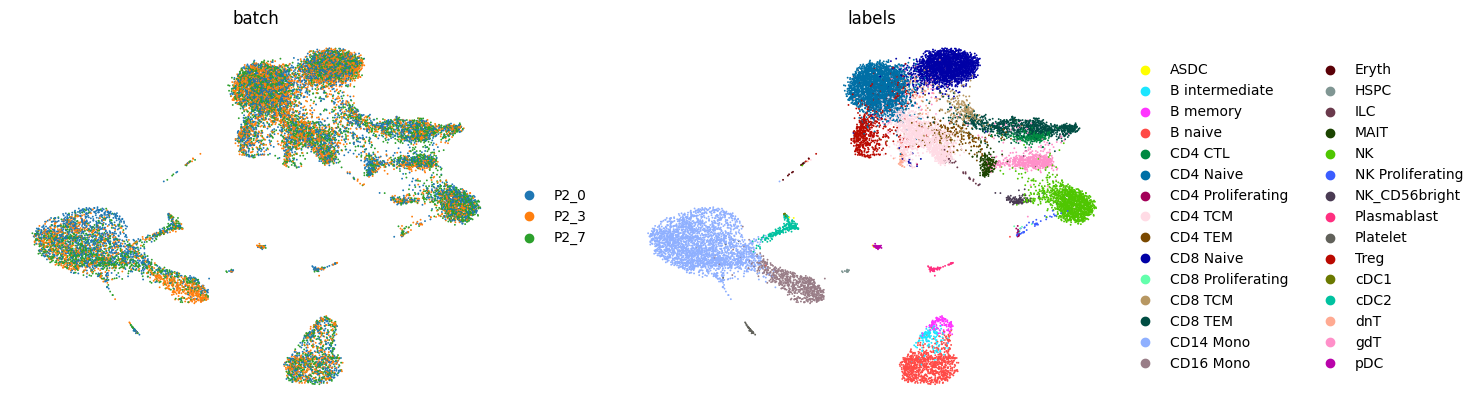

In [30]:
sc.pl.umap(adata, color=['batch', 'labels'], frameon=False)

/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warn

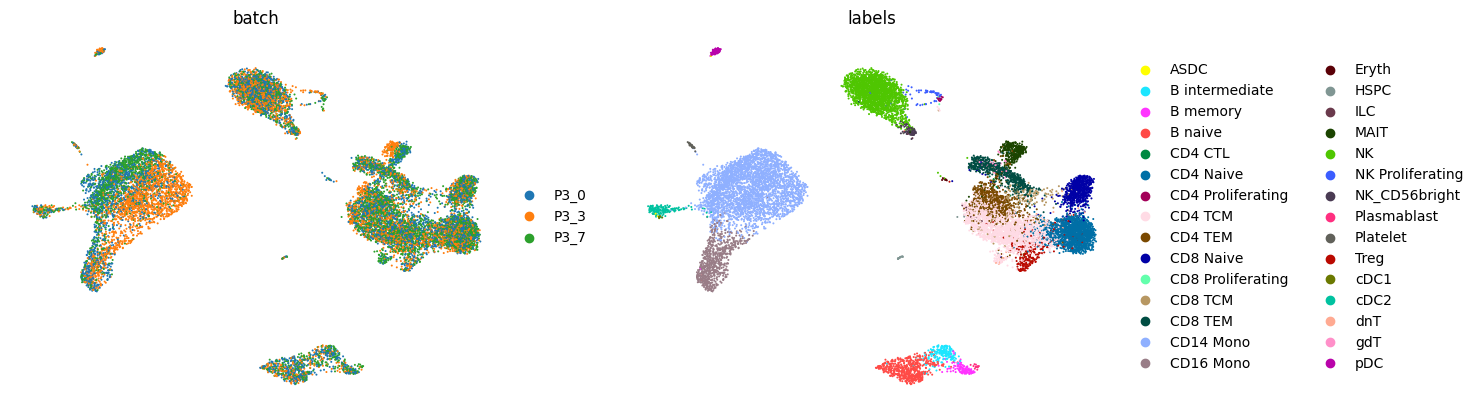

In [24]:
sc.pl.umap(adata, color=['batch', 'labels'], frameon=False)

# Harmony Integration

In [15]:
sc.tl.pca(adata, svd_solver='arpack', n_comps=50)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:06)


In [16]:
# Batch correction with Harmony
sc.external.pp.harmony_integrate(adata, 'batch')

2024-05-13 12:18:03,040 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-05-13 12:18:08,284 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-05-13 12:18:08,358 - harmonypy - INFO - Iteration 1 of 10
2024-05-13 12:18:12,877 - harmonypy - INFO - Iteration 2 of 10
2024-05-13 12:18:17,479 - harmonypy - INFO - Iteration 3 of 10
2024-05-13 12:18:22,050 - harmonypy - INFO - Iteration 4 of 10
2024-05-13 12:18:26,689 - harmonypy - INFO - Iteration 5 of 10
2024-05-13 12:18:31,285 - harmonypy - INFO - Iteration 6 of 10
2024-05-13 12:18:35,885 - harmonypy - INFO - Iteration 7 of 10
2024-05-13 12:18:40,501 - harmonypy - INFO - Iteration 8 of 10
2024-05-13 12:18:42,451 - harmonypy - INFO - Iteration 9 of 10
2024-05-13 12:18:43,993 - harmonypy - INFO - Iteration 10 of 10
2024-05-13 12:18:45,513 - harmonypy - INFO - Converged after 10 iterations


In [17]:
sc.pp.neighbors(adata, use_rep='X_pca_harmony', n_neighbors=50, n_pcs=50)
sc.tl.umap(adata)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:11)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:31)


/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/projectnb/czproj/ycliu137/.conda/envs/scanpy_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warn

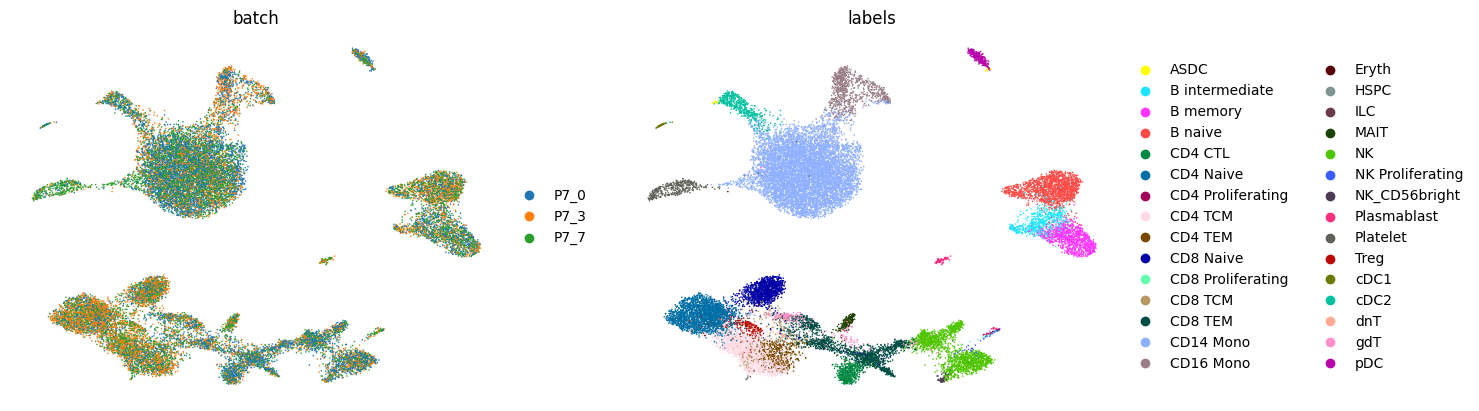

In [18]:
sc.pl.umap(adata, color=['batch', 'labels'], frameon=False)

/scratch/7147574.1.korolevgroup-gpu-pub/ipykernel_1132117/1530453189.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adata.obs[cell_type][adata.obs['labels']==cell_type]='True'
/scratch/7147574.1.korolevgroup-gpu-pub/ipykernel_1132117/15

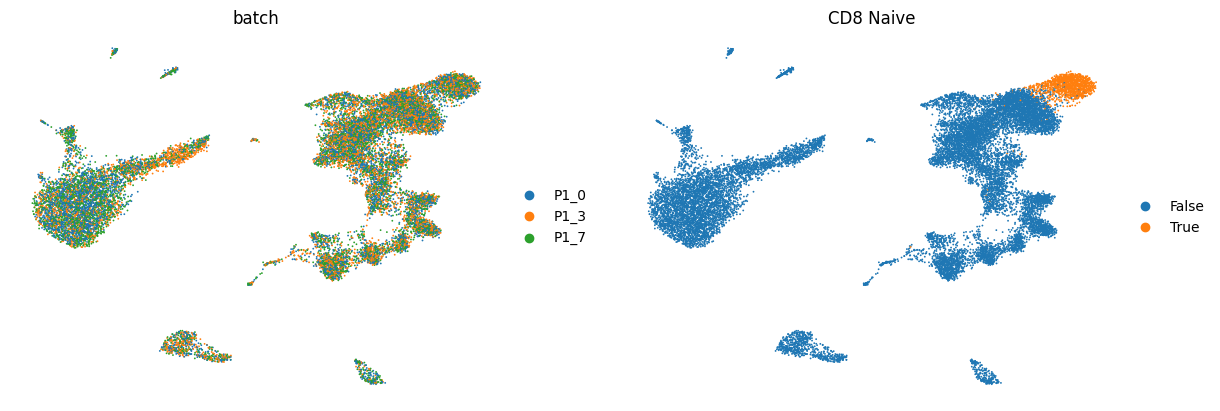

In [23]:
cell_type = 'CD8 Naive'
adata.obs[cell_type] = 'False'
adata.obs[cell_type][adata.obs['labels']==cell_type]='True'
sc.pl.umap(adata, color=['batch', cell_type], frameon=False)

/scratch/7147574.1.korolevgroup-gpu-pub/ipykernel_1132117/1332477425.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adata.obs[cell_type][adata.obs['labels']==cell_type]='True'
/scratch/7147574.1.korolevgroup-gpu-pub/ipykernel_1132117/13

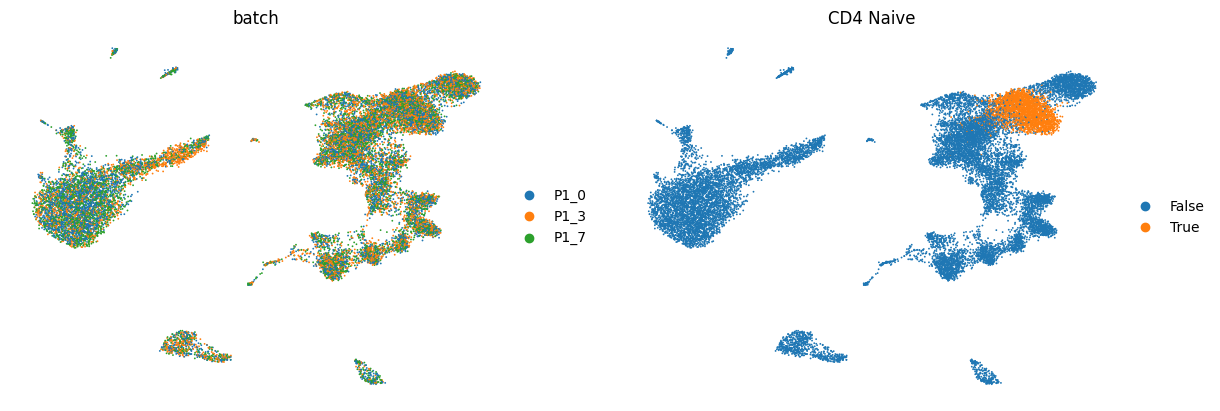

In [26]:
cell_type = 'CD4 Naive'
adata.obs[cell_type] = 'False'
adata.obs[cell_type][adata.obs['labels']==cell_type]='True'
sc.pl.umap(adata, color=['batch', cell_type], frameon=False)

/scratch/7147574.1.korolevgroup-gpu-pub/ipykernel_1132117/256791126.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adata.obs[cell_type][adata.obs['labels']==cell_type]='True'
/scratch/7147574.1.korolevgroup-gpu-pub/ipykernel_1132117/256

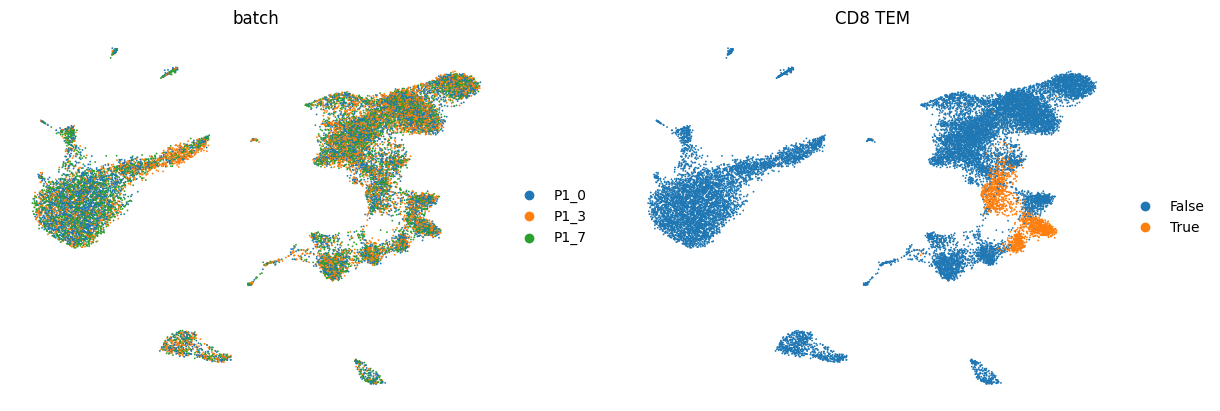

In [25]:
cell_type = 'CD8 TEM'
adata.obs[cell_type] = 'False'
adata.obs[cell_type][adata.obs['labels']==cell_type]='True'
sc.pl.umap(adata, color=['batch', cell_type], frameon=False)

/scratch/7147574.1.korolevgroup-gpu-pub/ipykernel_1132117/3477239001.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adata.obs['NK'][adata.obs['labels']=='NK']='True'
/scratch/7147574.1.korolevgroup-gpu-pub/ipykernel_1132117/3477239001.p

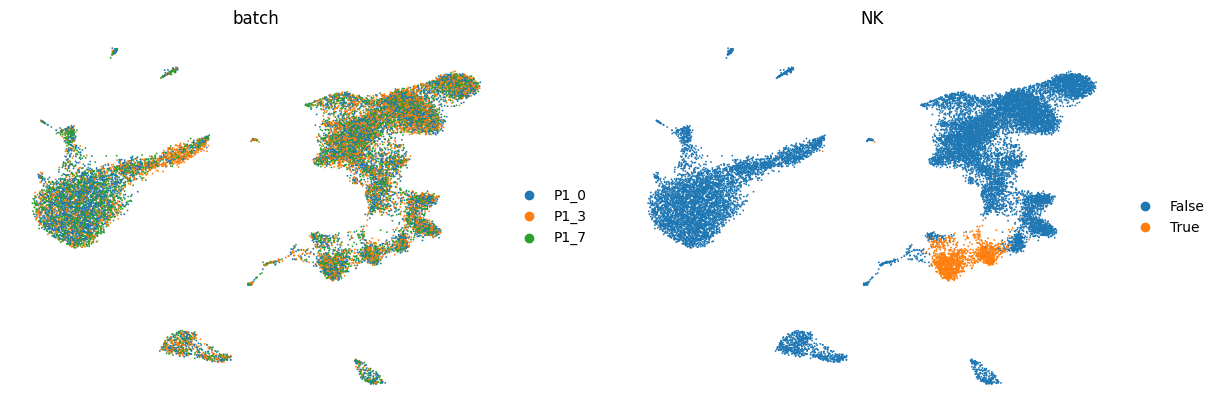

In [22]:
adata.obs['NK'] = 'False'
adata.obs['NK'][adata.obs['labels']=='NK']='True'
sc.pl.umap(adata, color=['batch', 'NK'], frameon=False)